[[-0.09943149 -0.01789183]
 [ 9.9702337   9.9988718 ]]
[[[11.79173492  2.33750609]
  [ 2.33750609  0.96372913]]

 [[ 0.96389714 -0.01181316]
  [-0.01181316  0.97632596]]]
3.4339095684621985


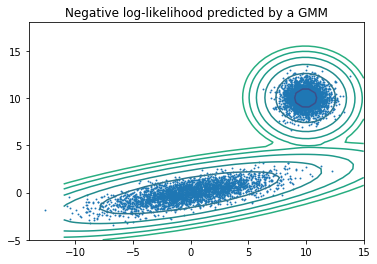

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
import pandas as pd

n_samples = 3000

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([10, 10])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-11., 15.)
y = np.linspace(-5., 18.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z1 = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z1, norm=LogNorm(vmin=1.0, vmax=100.0),
                 #levels=np.logspace(0, 3, 10))
                 levels=[3,6,9,12,15,18])
#CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

print clf.means_
print clf.covariances_

print (clf.covariances_[0,0,0])**0.5

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

In [ ]:
print clf.means_
print clf.covariances_

In [ ]:
print shifted_gaussian

# Graduated DE

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pylab
import numpy as np
import pandas as pd
import math
from matplotlib.colors import LogNorm
from sklearn import mixture
#dir_name = '\Users\Casa\SimpleMC\SimpleMC-master\chains_graduated\'
dir_name = ''

def error_ellipse(mu, cov, ax=None, factor=1.0, **kwargs):
    """
    Plot the error ellipse at a point given its covariance matrix.

    """
    # some sane defaults
    facecolor = kwargs.pop('facecolor', 'none')
    edgecolor = kwargs.pop('edgecolor', 'k')

    x, y = mu
    U, S, V = np.linalg.svd(cov)
    theta = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    ellipsePlot = Ellipse(xy=[x, y],
                          width=2 * np.sqrt(S[0]) * factor,
                          height=2 * np.sqrt(S[1]) * factor,
                          angle=theta,
                          facecolor=facecolor, edgecolor=edgecolor, **kwargs)

    if ax is None:
        ax = plt.gca()
    ax.add_patch(ellipsePlot)

    return ellipsePlot 

#params1 = {'backend': 'pdf',
#               'axes.labelsize': 20,
#               'xtick.labelsize': 20,
#               'ytick.labelsize': 20,
#               'legend.fontsize': 16,
#               'lines.markersize': 6,
#               'font.size': 25,
#               'text.usetex': True}#
#pylab.rcParams.update(params1)

In [ ]:
names = ['a','b','Om','Ob','h','ggama','glambda','c','d','e','f','g','s','i','j','k','l','z']

lam_val=20



df1 = pd.read_csv(dir_name+'Grad_nega_'+str(lam_val)+'_phy_Planck_15+BBAO+SN+HD_1.txt', sep='\s+', names=names)
df2 = pd.read_csv(dir_name+'Grad_nega_'+str(lam_val)+'_phy_Planck_15+BBAO+SN+HD_2.txt', sep='\s+', names=names)
df3 = pd.read_csv(dir_name+'Grad_nega_'+str(lam_val)+'_phy_Planck_15+BBAO+SN+HD_3.txt', sep='\s+', names=names)
df4 = pd.read_csv(dir_name+'Grad_nega_'+str(lam_val)+'_phy_Planck_15+BBAO+SN+HD_4.txt', sep='\s+', names=names)
df5 = pd.read_csv(dir_name+'Grad_nega_'+str(lam_val)+'_phy_Planck_15+BBAO+SN+HD_5.txt', sep='\s+', names=names)
df6 = pd.read_csv(dir_name+'Grad_nega_'+str(lam_val)+'_phy_Planck_15+BBAO+SN+HD_6.txt', sep='\s+', names=names)


fusion1= np.hstack([df1[['ggama']].values, df1[['h']].values])#, df1[['a']].values, df1[['Om']].values])
fusion2= np.hstack([df2[['ggama']].values, df2[['h']].values])#, df2[['a']].values, df1[['Om']].values])
fusion3= np.hstack([df3[['ggama']].values, df3[['h']].values])#, df3[['a']].values, df1[['Om']].values])
fusion4= np.hstack([df4[['ggama']].values, df4[['h']].values])#, df4[['a']].values, df1[['Om']].values])
fusion5= np.hstack([df5[['ggama']].values, df5[['h']].values])#, df5[['a']].values, df1[['Om']].values])
fusion6= np.hstack([df6[['ggama']].values, df6[['h']].values])#, df6[['a']].values, df1[['Om']].values])


df=pd.concat([df1,df2,df3,df4,df5,df6])
fusion=np.vstack([fusion1,fusion2,fusion3,fusion4,fusion5,fusion6])



#aqui matamos el 20 porciento como burn in
a=len(fusion1)
pc=0.2
#fusion_corta=fusion[int(a*0.2):]

fusion_corta=np.vstack([fusion1[int(a*pc):],fusion2[int(a*pc):],fusion3[int(a*pc):],
                        fusion4[int(a*pc):],fusion5[int(a*pc):],fusion6[int(a*pc):]])


numero_elipses=2

gauss = mixture.GaussianMixture(n_components=numero_elipses, covariance_type='full')
gauss.fit(fusion_corta)
#print df.head()
print (gauss.means_)
print (gauss.covariances_)

#df = df.drop(columns=['a','b','c','d','e','f','g','s','i','j','k','l'])
#print df
#dg = df[df['ggama']<-0.037]
#print dg.head()
#dg.to_csv('Grad_nega_vayl2_phy_Planck_15+BBAO+SN+HD_filterbelow_6.txt', header=None, sep=' ')

plt.scatter(fusion_corta[:, 0], fusion_corta[:, 1], .01)

# 1sigma
for j in range(numero_elipses):
    error_ellipse([gauss.means_[j,0],gauss.means_[j,1]],[[gauss.covariances_[j,0,0],gauss.covariances_[j,0,1]],
                                                      [gauss.covariances_[j,1,0],gauss.covariances_[j,1,1]]])
    error_ellipse([gauss.means_[j,0],gauss.means_[j,1]],[[4*gauss.covariances_[j,0,0],4*gauss.covariances_[j,0,1]],
                                                      [4*gauss.covariances_[j,1,0],4*gauss.covariances_[j,1,1]]])
    
#plt.title('Negative log-likelihood predicted by a GMM')
#plt.axis('tight')
plt.show()

In [ ]:
dg=df[df['a']>0.00000005]
print len(fusion_corta)
print len(fusion3)
print len(dg)

In [ ]:
plt.plot(df[['ggama']].values, (df[['a']].values), '.')

#plt.scatter(df[['ggama']].values, df[['h']].values, c=np.log(df[['a']].values),marker='.', cmap='binary')
#plt.colorbar()


#plt.scatter(fusion_corta[:,1], fusion_corta[:,0], c=np.log(fusion_corta[:,2]), marker='.', cmap='binary')
#plt.colorbar()


import scipy.stats as stats
import math
mu = gauss.means_[0,0]  
variance = gauss.covariances_[0,0,0]
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 0.00000002*stats.norm.pdf(x, mu, sigma))

mu2 = gauss.means_[1,0]  
variance2 = gauss.covariances_[1,0,0]
sigma2 = math.sqrt(variance2)
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
plt.plot(x2, 0.00000002*stats.norm.pdf(x2, mu2, sigma2))

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
import pandas as pd

numero_elipses=3

gauss = mixture.GaussianMixture(n_components=numero_elipses, covariance_type='full')
gauss.fit(fusion_corta)
#print df.head()
print (gauss.means_)
print (gauss.covariances_)
plt.scatter(fusion_corta[:, 0], fusion_corta[:, 1], .01)

for j in range(numero_elipses):
    error_ellipse([gauss.means_[j,0],gauss.means_[j,1]],[[gauss.covariances_[j,0,0],gauss.covariances_[j,0,1]],
                                                      [gauss.covariances_[j,1,0],gauss.covariances_[j,1,1]]])
    error_ellipse([gauss.means_[j,0],gauss.means_[j,1]],[[4*gauss.covariances_[j,0,0],4*gauss.covariances_[j,0,1]],
                                                      [4*gauss.covariances_[j,1,0],4*gauss.covariances_[j,1,1]]])
    
#plt.title('Negative log-likelihood predicted by a GMM')
#plt.axis('tight')
plt.show()

In [ ]:
plt.plot(df[['ggama']].values, (df[['a']].values), '.')

#plt.scatter(df[['ggama']].values, df[['h']].values, c=np.log(df[['a']].values),marker='.', cmap='binary')
#plt.colorbar()


#plt.scatter(fusion_corta[:,1], fusion_corta[:,0], c=np.log(fusion_corta[:,2]), marker='.', cmap='binary')
#plt.colorbar()


import scipy.stats as stats
import math
mu = gauss.means_[0,0]  
variance = gauss.covariances_[0,0,0]
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, 0.00000002*stats.norm.pdf(x, mu, sigma))

mu2 = gauss.means_[1,0]  
variance2 = gauss.covariances_[1,0,0]
sigma2 = math.sqrt(variance2)
x2 = np.linspace(mu2 - 3*sigma2, mu2 + 3*sigma2, 100)
plt.plot(x2, 0.00000002*stats.norm.pdf(x2, mu2, sigma2))

mu3 = gauss.means_[2,0]  
variance3 = gauss.covariances_[2,0,0]
sigma3 = math.sqrt(variance3)
x3 = np.linspace(mu3 - 3*sigma3, mu3 + 3*sigma3, 100)
plt.plot(x3, 0.00000002*stats.norm.pdf(x3, mu3, sigma3))
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
import pandas as pd


numero_elipses=4


gauss = mixture.GaussianMixture(n_components=numero_elipses, covariance_type='full')
gauss.fit(fusion_corta)
#print df.head()
print (gauss.means_)
print (gauss.covariances_)
plt.scatter(fusion_corta[:, 0], fusion_corta[:, 1], .01)


for j in range(numero_elipses):
    error_ellipse([gauss.means_[j,0],gauss.means_[j,1]],[[gauss.covariances_[j,0,0],gauss.covariances_[j,0,1]],
                                                      [gauss.covariances_[j,1,0],gauss.covariances_[j,1,1]]])
    error_ellipse([gauss.means_[j,0],gauss.means_[j,1]],[[4*gauss.covariances_[j,0,0],4*gauss.covariances_[j,0,1]],
                                                      [4*gauss.covariances_[j,1,0],4*gauss.covariances_[j,1,1]]])
    
#plt.title('Negative log-likelihood predicted by a GMM')
#plt.axis('tight')
plt.show()

In [ ]:
names = ['a','b','x','y']
isidro = pd.read_csv(dir_name+'/eggbox_1.txt', sep='\s+', names=names)
plt.plot(isidro[['x']].values, (isidro[['y']].values), '.')
plt.show()

In [ ]:

fusion1= np.hstack([isidro[['x']].values, isidro[['y']].values])#, df1[['a']].values, df1[['Om']].values])

numero_elipses=13


#aqui matamos el 20 porciento como burn in
a=len(fusion1)
pc=0.2
#fusion_corta=fusion[int(a*0.2):]

fusion_corta=fusion1[int(a*pc):]


gauss = mixture.GaussianMixture(n_components=numero_elipses, covariance_type='full')
gauss.fit(fusion_corta)
#print df.head()
print (gauss.means_)
print (gauss.covariances_)

#df = df.drop(columns=['a','b','c','d','e','f','g','s','i','j','k','l'])
#print df
#dg = df[df['ggama']<-0.037]
#print dg.head()
#dg.to_csv('Grad_nega_vayl2_phy_Planck_15+BBAO+SN+HD_filterbelow_6.txt', header=None, sep=' ')

plt.scatter(fusion_corta[:, 0], fusion_corta[:, 1], .9)


# 1sigma

for j in range(numero_elipses):
    error_ellipse([gauss.means_[j,0],gauss.means_[j,1]],[[gauss.covariances_[j,0,0],gauss.covariances_[j,0,1]],
                                                      [gauss.covariances_[j,1,0],gauss.covariances_[j,1,1]]])
    error_ellipse([gauss.means_[j,0],gauss.means_[j,1]],[[4*gauss.covariances_[j,0,0],4*gauss.covariances_[j,0,1]],
                                                      [4*gauss.covariances_[j,1,0],4*gauss.covariances_[j,1,1]]])
    

plt.show()

# Mixtures reducido

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pylab
import numpy as np
import pandas as pd
import math
from matplotlib.colors import LogNorm
from sklearn import mixture
#dir_name = '\Users\Casa\SimpleMC\SimpleMC-master\chains_graduated\'

#funcion que dibuja una elipse dado un promedio y una matriz de covarianza
def error_ellipse(mu, cov, ax=None, factor=1.0, **kwargs):
    """Plot the error ellipse at a point given its covariance matrix."""
    # some sane defaults
    facecolor = kwargs.pop('facecolor', 'none')
    edgecolor = kwargs.pop('edgecolor', 'k')
    x, y = mu
    U, S, V = np.linalg.svd(cov)
    theta = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
    ellipsePlot = Ellipse(xy=[x, y],
                          width=2 * np.sqrt(S[0]) * factor,
                          height=2 * np.sqrt(S[1]) * factor,
                          angle=theta,
                          facecolor=facecolor, edgecolor=edgecolor, **kwargs)
    if ax is None:
        ax = plt.gca()
    ax.add_patch(ellipsePlot)
    return ellipsePlot 

#funcion que lee las cadenas y las convierte en un formato legible para gaussian mixtures
def readChains(dir_name,root,names,par1,par2,pc):
    df=[]
    fusion=[]
    i=0
    e=True
    while e:
        try:
            df.append(pd.read_csv(dir_name+root+'_'+str(i+1)+'.txt',sep='\s+', names=names))
            a=len(df[i])
            fusion.append(np.hstack([df[i][[par1]].values, df[i][[par2]].values])[int(a*pc):])
            i+=1
        except:
            e=False
    fusion=np.vstack(fusion)
    return fusion

#funcion que imprime promedios y std. dev. de las gaussianas obtenidas
def stats_mixtures(fusion, par1, par2, num_elip, means, covs):
    print('Se tienen '+str(len(fusion))+' datos.')
    print('Los promedios de '+ par1 + ' son:')
    for i in range(num_elip):
        print(str(means[i,0])+' con std. dev. '+ str(np.sqrt(covs[i,0,0])))
    print('Los promedios de '+ par2 + ' son: ')
    for i in range(num_elip):
        print(str(means[i,1])+' con std. dev. '+  str(np.sqrt(covs[i,1,1])))
        
#funcion que grafica los datos junto con las elipses hasta 2 sigma
def graph_ellipses(num_elip, means, covs, fusion, par1, par2):
    for j in range(numero_elipses):
        error_ellipse([means[j,0],means[j,1]],[[covs[j,0,0],covs[j,0,1]],
                                [covs[j,1,0],covs[j,1,1]]])
        error_ellipse([means[j,0],means[j,1]],[[4*covs[j,0,0],4*covs[j,0,1]],
                                [4*covs[j,1,0],4*covs[j,1,1]]])
    plt.scatter(fusion[:, 0], fusion[:, 1], .01)
    plt.xlabel(par1)
    plt.ylabel(par2)
    plt.show()

Se tienen 28776 datos.
Los promedios de h son:
0.6986295517430636 con std. dev. 0.010326258965006527
0.6848614386782141 con std. dev. 0.008217423242621211
Los promedios de Om son: 
0.29217088905936794 con std. dev. 0.010737227773115941
0.30034791960548873 con std. dev. 0.010312176346609003


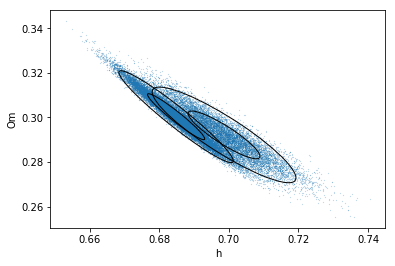

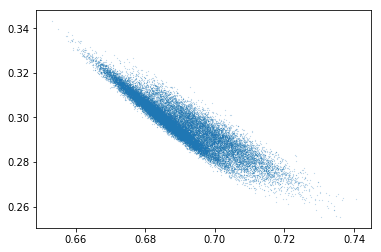

In [8]:
names = ['a','b','Om','Ob','h','ggama','glambda','c','d','e','f','g','s','i','j','k','l','Psi']

dir_name=''
lam_val='vayl'
par1='h'
par2='Om'
root='grad_with_psiGrad_nega_'+str(lam_val)+'_phy_Planck_15+BBAO+SN+HD'
numero_elipses=2
pc=0.97


fusion = readChains(dir_name,root,names,par1,par2,pc)

gauss = mixture.GaussianMixture(n_components=numero_elipses, covariance_type='full')
gauss.fit(fusion)

stats_mixtures(fusion, par1, par2, numero_elipses, gauss.means_, gauss.covariances_)

graph_ellipses(numero_elipses, gauss.means_, gauss.covariances_, fusion, par1, par2)
plt.scatter(fusion[:, 0], fusion[:, 1], .01)


In [5]:
print fusion

NameError: name 'fusion' is not defined